# SUPPLY CHAIN MANAGEMENT 

### Introduction

#### In response to challenges faced by a Fast Moving Consumer Goods (FMCG) company in managing their instant noodles business, this project aims to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse. Over the past two years, the company's higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country. To address this issue, a comprehensive data science approach was undertaken, focusing on Exploratory Data Analysis (EDA), data processing, model building, evaluation, and visualization. The dataset comprises of crucial attributes such as warehouse details, geographical factors, and historical performance metrics. Here, we use supervised regression algorithms such as linear regression, decision tree, random forest, AdaBoost, Gradient Boosting and Support Vector Machine. The project aimed to uncover hidden patterns, trends, and insights within the data to make informed decisions regarding inventory management and supply chain optimization.

### Import necessary modules

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
from sklearn.preprocessing import LabelEncoder

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Load Dataset

In [147]:
# Training Dataset
df_train=pd.read_csv('supply_train.csv') 

In [148]:
df_train

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


The training dataset consist of 16620 rows and 25 columns

In [149]:
df_train.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [150]:
# Testing Dataset
df_test=pd.read_csv('supply_test.csv')

In [151]:
df_test

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


The testing dataset consist of 5529 rows and 25 columns

In [152]:
df_test.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


### Data Exploration

In [153]:
# Training Data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [154]:
# Testing Data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [155]:
# Training Data
df_train.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [156]:
# Testing Data
df_test.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [157]:
# Training Data
df_train.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [158]:
# Training Data
for i in df_train.columns:
    print(f'Column {i} : {df_train[i].nunique()}')

Column Unnamed: 0 : 16620
Column Ware_house_ID : 16620
Column WH_Manager_ID : 16620
Column Location_type : 2
Column WH_capacity_size : 3
Column zone : 4
Column WH_regional_zone : 6
Column num_refill_req_l3m : 9
Column transport_issue_l1y : 6
Column Competitor_in_mkt : 12
Column retail_shop_num : 4356
Column wh_owner_type : 2
Column distributor_num : 56
Column flood_impacted : 2
Column flood_proof : 2
Column electric_supply : 2
Column dist_from_hub : 217
Column workers_num : 60
Column wh_est_year : 28
Column storage_issue_reported_l3m : 37
Column temp_reg_mach : 2
Column approved_wh_govt_certificate : 5
Column wh_breakdown_l3m : 7
Column govt_check_l3m : 32
Column product_wg_ton : 4248


In [159]:
# Testing Data
for i in df_test.columns:
    print(f'{i} : {df_test[i].nunique()}')

Unnamed: 0 : 5529
Ware_house_ID : 5529
WH_Manager_ID : 5529
Location_type : 2
WH_capacity_size : 3
zone : 4
WH_regional_zone : 6
num_refill_req_l3m : 9
transport_issue_l1y : 6
Competitor_in_mkt : 9
retail_shop_num : 2891
wh_owner_type : 2
distributor_num : 56
flood_impacted : 2
flood_proof : 2
electric_supply : 2
dist_from_hub : 217
workers_num : 55
wh_est_year : 28
storage_issue_reported_l3m : 37
temp_reg_mach : 2
approved_wh_govt_certificate : 5
wh_breakdown_l3m : 7
govt_check_l3m : 32
product_wg_ton : 2946


In [160]:
# Training Data
for i in df_train.columns:
    print(f'{i} : {df_train[i].unique()}')

Unnamed: 0 : [    0     1     2 ... 16617 16618 16619]
Ware_house_ID : ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619']
WH_Manager_ID : ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619']
Location_type : ['Urban' 'Rural']
WH_capacity_size : ['Small' 'Large' 'Mid']
zone : ['West' 'North' 'South' 'East']
WH_regional_zone : ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
num_refill_req_l3m : [3 0 1 7 8 4 6 5 2]
transport_issue_l1y : [1 0 4 3 2 5]
Competitor_in_mkt : [ 2  4  3  5  1  8  7  6 10  9 12  0]
retail_shop_num : [4651 6217 4306 ... 2716 8344 7347]
wh_owner_type : ['Rented' 'Company Owned']
distributor_num : [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
flood_impacted : [0 1]
flood_proof : [1 0]
electric_supply : [1 0]
dist_from_hub : [ 91 210 161 103 112 152  77 241 124  78 150 225  95 242 12

### Data Preprocessing

In [161]:
# Drop Column unnamed in training data
df_train.drop(['Unnamed: 0'], axis=1, inplace=True)
df_train.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [162]:
# Drop Column unnamed in testing data
df_test.drop(['Unnamed: 0'], axis=1, inplace=True)
df_test.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,5856,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,4803,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,3699,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [163]:
# Checking null values in training data
df_train.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

The columns workers_num, wh_est_year and approved_wh_govt_certificate have null values.

In [164]:
# Handle Null Values in Training Data
wh_est_year_mean=df_train.wh_est_year.mean()
df_train['wh_est_year'].fillna(wh_est_year_mean, inplace=True)

In [165]:
# Drop null values in Training Data
df_train=df_train.dropna()

In [166]:
df_train.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [167]:
# Count number of duplicate rows in Training data
df_train.duplicated().sum() 

0

In [168]:
df_train.shape

(15374, 24)

After Handling the null values and unwanted column in the training dataset, now the dataset consist of 15374 rows and 24 columns.

In [169]:
# Checking null values in testing data
df_test.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

The columns workers_num, wh_est_year and approved_wh_govt_certificate have null values.

In [170]:
# Handle Null Values in Testing Data
wh_est_year_mean=df_test.wh_est_year.mean()
df_test['wh_est_year'].fillna(wh_est_year_mean, inplace=True)

In [171]:
# Drop null values in Testing Data
df_test=df_test.dropna()

In [172]:
df_test.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [173]:
# Count number of duplicate rows in Testing data
df_test.duplicated().sum() 

0

In [174]:
df_test.shape

(5120, 24)

After Handling the null values and unwanted column in the testing dataset, now the dataset consist of 5120 rows and 24 columns.

### Exploratory Data Analysis

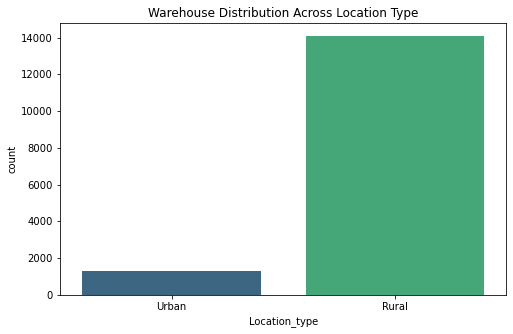

In [175]:
# Warehouse Distribution Across Location Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Location_type', data=df_train, palette='viridis')
plt.title('Warehouse Distribution Across Location Type')
plt.show()

The majority of warehouses are situated in rural areas.

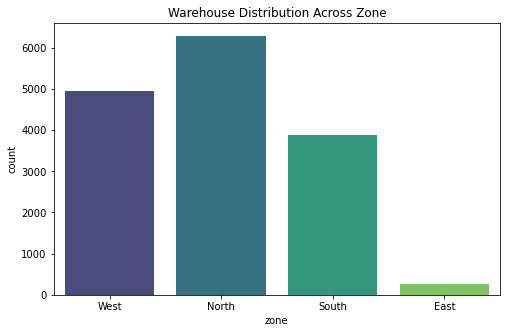

In [176]:
# Warehouse Distribution Across Zone
plt.figure(figsize=(8, 5))
sns.countplot(x='zone', data=df_train, palette='viridis')
plt.title('Warehouse Distribution Across Zone')
plt.show()

The north zone has more warehouses whereas east zone has the fewest.

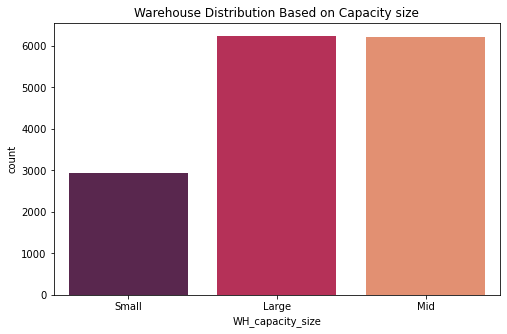

In [177]:
# Warehouse Distribution Based on Capacity size
plt.figure(figsize=(8, 5))
sns.countplot(x='WH_capacity_size', data=df_train, palette='rocket')
plt.title('Warehouse Distribution Based on Capacity size')
plt.show()

In [178]:
df_train.WH_capacity_size.value_counts()

Large    6238
Mid      6209
Small    2927
Name: WH_capacity_size, dtype: int64

The majority of warehouses have large capacity sizes, followed by mid-capacity sizes.

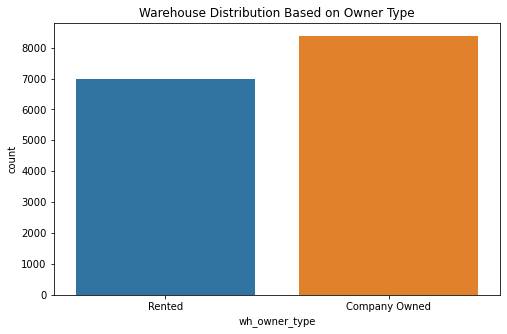

In [179]:
# Warehouse Distribution Based on Owner Type
plt.figure(figsize=(8, 5))
sns.countplot(x='wh_owner_type', data=df_train)
plt.title('Warehouse Distribution Based on Owner Type')
plt.show()

The majority of warehouses are owned by the company.

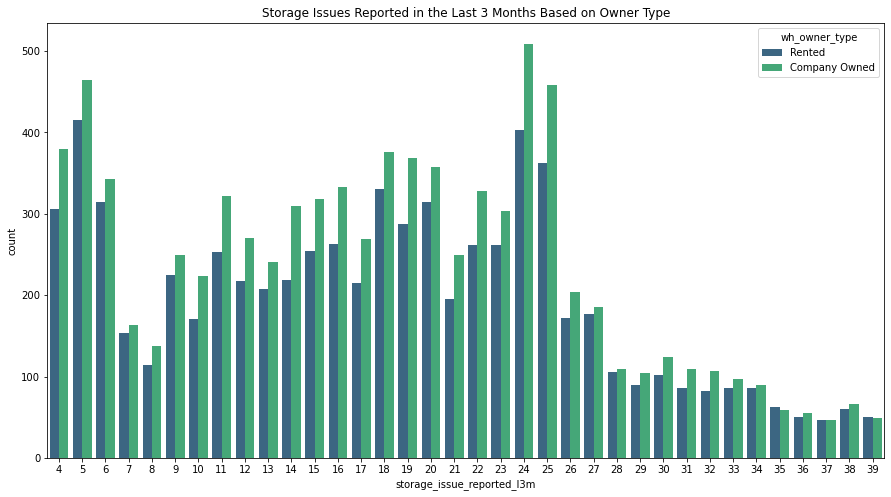

In [180]:
# Storage Issues Reported in the Last 3 Months Based on Owner Type
plt.figure(figsize=(15,8))
sns.countplot(x='storage_issue_reported_l3m', data=df_train, hue='wh_owner_type', palette='viridis')
plt.title('Storage Issues Reported in the Last 3 Months Based on Owner Type')
plt.show()

A significant proportion of storage issues is reported from warehouses owned by the company, indicating the need for internal attention and improvement.

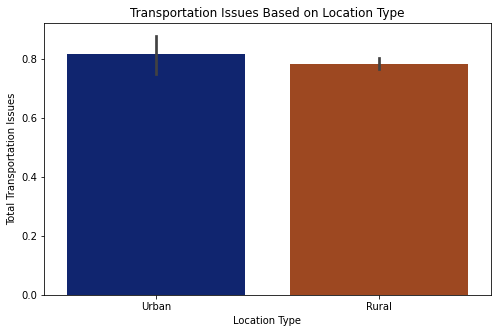

In [181]:
# Transportation issue Based on Location Type
plt.figure(figsize=(8, 5))
sns.barplot(x='Location_type', y='transport_issue_l1y', data=df_train, palette='dark')
plt.title('Transportation Issues Based on Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Transportation Issues')
plt.show()

Transportation issues are slightly more frequent in urban areas.

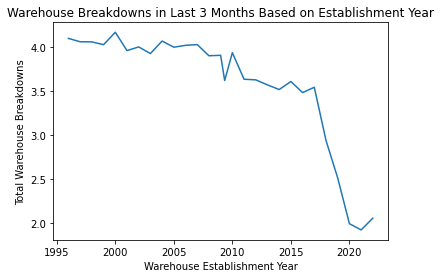

In [182]:
# Warehouse Breakdowns in Last 3 Months Based on Establishment Year
sns.lineplot(data=df_train, x='wh_est_year', y='wh_breakdown_l3m', ci=None)
plt.title('Warehouse Breakdowns in Last 3 Months Based on Establishment Year')
plt.xlabel('Warehouse Establishment Year')
plt.ylabel('Total Warehouse Breakdowns')
plt.show()

As warehouses age, there is a corresponding increase in breakdown occurrences, indicating a potential need for maintenance or upgrades in older facilities.

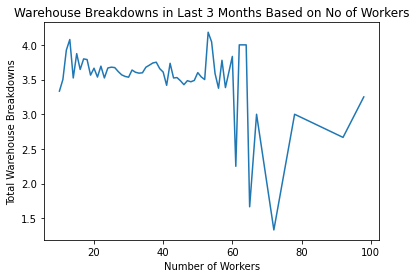

In [183]:
# Warehouse Breakdowns in Last 3 Months Based on No of Workers
sns.lineplot(data=df_train, x='workers_num', y='wh_breakdown_l3m', ci=None)
plt.title('Warehouse Breakdowns in Last 3 Months Based on No of Workers')
plt.xlabel('Number of Workers')
plt.ylabel('Total Warehouse Breakdowns')
plt.show()

The warehouses with a smaller workforce may face higher breakdown rates compared to large workforce. But still warehouses with large workforce also faces breakdown, but not as much as the smaller workforce. Thus this indicates the importance of sufficient staffing levels in maintaining operational reliability.

In [184]:
# Convert to numeric datatype in Training Data
df_train['Ware_house_ID'] = df_train['Ware_house_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

<ipython-input-184-7179786351ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Ware_house_ID'] = df_train['Ware_house_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))


In [185]:
df_train.Ware_house_ID.dtype

dtype('int64')

In [186]:
df_train['WH_Manager_ID'] = df_train['WH_Manager_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

<ipython-input-186-0feeceec5896>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['WH_Manager_ID'] = df_train['WH_Manager_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))


In [187]:
df_train.WH_Manager_ID.dtype

dtype('int64')

In [188]:
df_train.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2009.34532,13,0,A,5,15,17115
1,100001,50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2009.34532,4,0,A,3,17,5074
2,100002,50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,2009.34532,17,0,A,6,22,23137
3,100003,50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,2009.34532,17,1,A+,3,27,22115
4,100004,50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.00000,18,0,C,6,24,24071


In [189]:
# Convert to numeric datatype in Testing Data
df_test['Ware_house_ID'] = df_test['Ware_house_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

<ipython-input-189-4269b52a1b05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Ware_house_ID'] = df_test['Ware_house_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))


In [190]:
df_test.Ware_house_ID.dtype

dtype('int64')

In [191]:
df_test['WH_Manager_ID'] = df_test['WH_Manager_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

<ipython-input-191-3072d3e34bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['WH_Manager_ID'] = df_test['WH_Manager_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))


In [192]:
df_test.WH_Manager_ID.dtype

dtype('int64')

In [193]:
df_test.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,116622,66622,Rural,Large,North,Zone 5,5,0,2,5856,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,116623,66623,Rural,Small,North,Zone 6,3,0,3,4803,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,116624,66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,116625,66625,Urban,Mid,North,Zone 4,6,0,4,3699,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [194]:
# Find Categorical Columns
df_train.select_dtypes(include=['object']).columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate'],
      dtype='object')

In [195]:
# Label Encoding in Training Data
label_encoder=LabelEncoder()
df_train['Location_type'] = label_encoder.fit_transform(df_train['Location_type'])
df_train['WH_capacity_size'] = label_encoder.fit_transform(df_train['WH_capacity_size'])
df_train['zone'] = label_encoder.fit_transform(df_train['zone'])
df_train['WH_regional_zone'] = label_encoder.fit_transform(df_train['WH_regional_zone'])
df_train['wh_owner_type'] = label_encoder.fit_transform(df_train['wh_owner_type'])
df_train['approved_wh_govt_certificate'] = label_encoder.fit_transform(df_train['approved_wh_govt_certificate'])
df_train.head()

<ipython-input-195-204a75347cec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Location_type'] = label_encoder.fit_transform(df_train['Location_type'])
<ipython-input-195-204a75347cec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['WH_capacity_size'] = label_encoder.fit_transform(df_train['WH_capacity_size'])
<ipython-input-195-204a75347cec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,50000,1,2,3,5,3,1,2,4651,...,1,91,29.0,2009.34532,13,0,0,5,15,17115
1,100001,50001,0,0,1,4,0,0,4,6217,...,1,210,31.0,2009.34532,4,0,0,3,17,5074
2,100002,50002,0,1,2,1,1,0,4,4306,...,0,161,37.0,2009.34532,17,0,0,6,22,23137
3,100003,50003,0,1,1,2,7,4,2,6000,...,0,103,21.0,2009.34532,17,1,1,3,27,22115
4,100004,50004,0,0,1,4,3,1,2,4740,...,1,112,25.0,2009.00000,18,0,4,6,24,24071


In [196]:
# Label Encoding in Testing Data
label_encoder=LabelEncoder()
df_test['Location_type'] = label_encoder.fit_transform(df_test['Location_type'])
df_test['WH_capacity_size'] = label_encoder.fit_transform(df_test['WH_capacity_size'])
df_test['zone'] = label_encoder.fit_transform(df_test['zone'])
df_test['WH_regional_zone'] = label_encoder.fit_transform(df_test['WH_regional_zone'])
df_test['wh_owner_type'] = label_encoder.fit_transform(df_test['wh_owner_type'])
df_test['approved_wh_govt_certificate'] = label_encoder.fit_transform(df_test['approved_wh_govt_certificate'])
df_test.head()

<ipython-input-196-8f9f1273cc84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Location_type'] = label_encoder.fit_transform(df_test['Location_type'])
<ipython-input-196-8f9f1273cc84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['WH_capacity_size'] = label_encoder.fit_transform(df_test['WH_capacity_size'])
<ipython-input-196-8f9f1273cc84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,0,0,1,4,5,0,3,5590,...,0,156,30.0,2006.0,24,0,0,2,5,30132
1,116622,66622,0,0,1,4,5,0,2,5856,...,1,79,31.0,2019.0,5,1,4,2,24,6075
2,116623,66623,0,2,1,5,3,0,3,4803,...,1,70,41.0,2008.0,19,1,1,5,9,24076
3,116624,66624,0,1,3,3,5,2,2,4784,...,1,255,33.0,2017.0,9,1,1,3,11,13092
4,116625,66625,1,1,1,3,6,0,4,3699,...,0,205,20.0,1999.0,25,0,2,4,26,29071


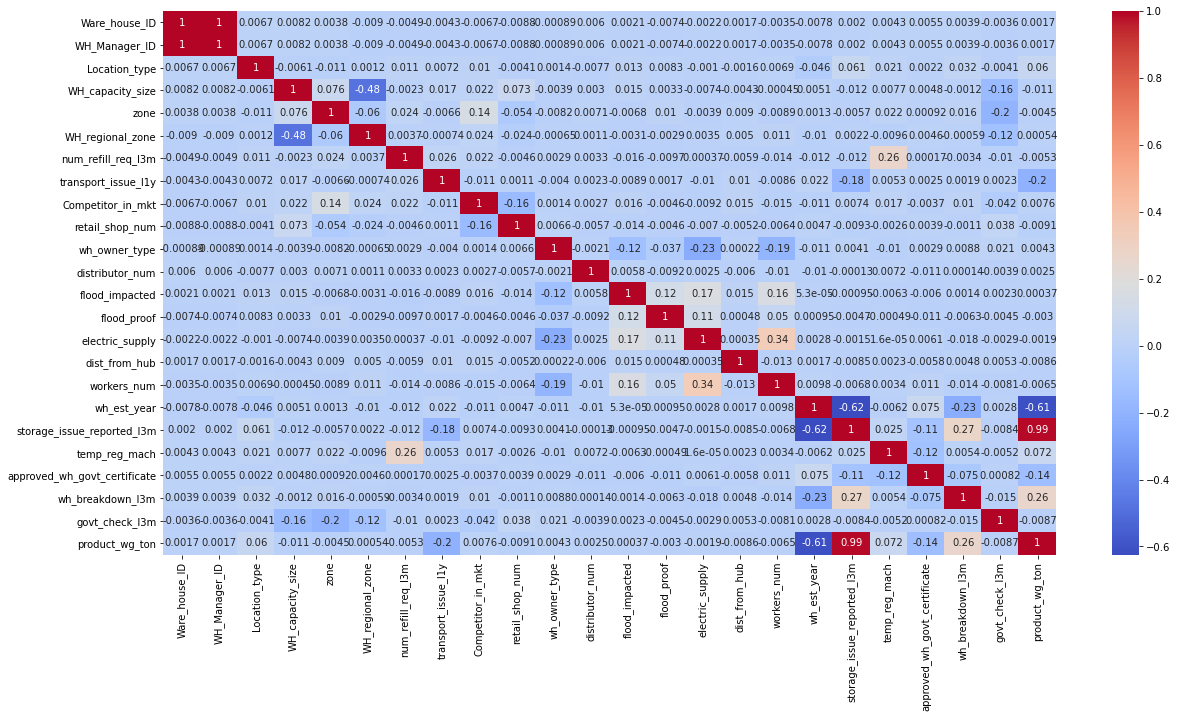

In [197]:
# Correlation
corr=df_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

Here we observe that variables that have strong positive correlation(as one variable increases, the other variable tends to increase proportionally) is storage_issue_reported_l3m. 

The variables that have moderate positive correlation(as one variable increases, the other variable also increases moderately) is wh_breakdown_l3m. 

The variables that have a strong negative correlation(as one variable increases, the other variable tends to decrease significantly) is wh_est_year. 

The variables that have weak correlation are Ware_house_ID, WH_Manager_ID, Location_type, WH_capacity_size, zone, WH_regional_zone, num_refill_req_l3m, transport_issue_l1y, Competitor_in_mkt, retail_shop_num ,wh_owner_type, distributor_num, flood_impacted, flood_proof, electric_supply, dist_from_hub, workers_num,temp_reg_mach, approved_wh_govt_certificate, govt_check_l3m

### Training and Testing Data

In [198]:
# Drop less relevant features in training data
train_df=df_train.drop(['WH_Manager_ID','WH_regional_zone', 'flood_impacted'], axis = 1)
train_df.head()

,Ware_house_ID,Location_type,WH_capacity_size,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,1,2,3,3,1,2,4651,1,24,...,1,91,29.0,2009.34532,13,0,0,5,15,17115
1,100001,0,0,1,0,0,4,6217,0,47,...,1,210,31.0,2009.34532,4,0,0,3,17,5074
2,100002,0,1,2,1,0,4,4306,0,64,...,0,161,37.0,2009.34532,17,0,0,6,22,23137
3,100003,0,1,1,7,4,2,6000,1,50,...,0,103,21.0,2009.34532,17,1,1,3,27,22115
4,100004,0,0,1,3,1,2,4740,0,42,...,1,112,25.0,2009.00000,18,0,4,6,24,24071


In [199]:
# Drop less relevant features in testing data
test_df=df_test.drop(['WH_Manager_ID','WH_regional_zone', 'flood_impacted'], axis = 1)
test_df.head()

,Ware_house_ID,Location_type,WH_capacity_size,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,0,0,1,5,0,3,5590,0,15,...,0,156,30.0,2006.0,24,0,0,2,5,30132
1,116622,0,0,1,5,0,2,5856,0,40,...,1,79,31.0,2019.0,5,1,4,2,24,6075
2,116623,0,2,1,3,0,3,4803,1,40,...,1,70,41.0,2008.0,19,1,1,5,9,24076
3,116624,0,1,3,5,2,2,4784,1,15,...,1,255,33.0,2017.0,9,1,1,3,11,13092
4,116625,1,1,1,6,0,4,3699,1,24,...,0,205,20.0,1999.0,25,0,2,4,26,29071


In [200]:
# Splitting training data
X_train=train_df.drop(['product_wg_ton'], axis=1)
y_train=train_df['product_wg_ton']

In [201]:
X_train.head(3)

,Ware_house_ID,Location_type,WH_capacity_size,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,100000,1,2,3,3,1,2,4651,1,24,1,1,91,29.0,2009.34532,13,0,0,5,15
1,100001,0,0,1,0,0,4,6217,0,47,0,1,210,31.0,2009.34532,4,0,0,3,17
2,100002,0,1,2,1,0,4,4306,0,64,0,0,161,37.0,2009.34532,17,0,0,6,22


In [202]:
y_train.head(3)

0    17115
1     5074
2    23137
Name: product_wg_ton, dtype: int64

In [203]:
# Splitting testing data
X_test=test_df.drop(['product_wg_ton'], axis=1)
y_test=test_df['product_wg_ton']

In [204]:
X_test.head(3)

,Ware_house_ID,Location_type,WH_capacity_size,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,116621,0,0,1,5,0,3,5590,0,15,0,0,156,30.0,2006.0,24,0,0,2,5
1,116622,0,0,1,5,0,2,5856,0,40,0,1,79,31.0,2019.0,5,1,4,2,24
2,116623,0,2,1,3,0,3,4803,1,40,0,1,70,41.0,2008.0,19,1,1,5,9


In [205]:
y_test.head(3)

0    30132
1     6075
2    24076
Name: product_wg_ton, dtype: int64

### Supervised Regression Algorithms

### Linear Regression

In [210]:
lr=LinearRegression() # object creation
lr.fit(X_train,y_train) # model building
lr_pred=lr.predict(X_test)
lr_pred

array([30975.48547366,  7004.10658401, 25458.39920648, ...,
       24654.28358385, 15910.18478731, 12725.91488717])

### Decision Tree

In [211]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)
dt_pred

array([33089.,  7073., 27119., ..., 23122., 15075., 14089.])

### Random Forest

In [212]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
rf_pred

array([31448.15,  6790.64, 25615.67, ..., 23710.79, 15272.41, 13879.82])

### AdaBoost

In [213]:
ada=AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred=ada.predict(X_test)
ada_pred

array([30601.45737521,  7293.56161021, 25284.364241  , ...,
       25928.69900037, 17283.42811839, 14253.52708804])

### Gradient Boosting

In [214]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred=gb.predict(X_test)
gb_pred

array([31075.09128238,  6903.69771805, 25527.92609077, ...,
       23276.96297445, 15137.56230533, 13841.28726962])

### Support Vector Machine

In [226]:
svm=SVR(kernel='linear') 
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_pred

array([34441.01301684,  7014.7668468 , 26137.65877642, ...,
       29406.35398783, 18289.70603861, 13922.66258158])

### Evaluation

In [227]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Support Vector Machine']
predictions = [lr_pred, dt_pred, rf_pred, ada_pred, gb_pred, svm_pred]

for model_name, pred in zip(models, predictions):
    mse = mean_squared_error(y_test, pred)
    msa=mean_absolute_error(y_test,pred)
    r2 = r2_score(y_test, pred)
    print(f"{model_name} - MSE: {mse}, MSA: {msa}, R2 Score: {r2}")

Linear Regression - MSE: 1932380.8502182476, MSA: 1089.0420693184683, R2 Score: 0.9850863141868744
Decision Tree - MSE: 1407969.934765625, MSA: 843.650390625, R2 Score: 0.989133601050202
Random Forest - MSE: 701851.1039183984, MSA: 658.1365703125, R2 Score: 0.9945832692089387
AdaBoost - MSE: 2352937.951253699, MSA: 1237.06810598708, R2 Score: 0.9818405479754088
Gradient Boosting - MSE: 633146.774354427, MSA: 632.7339414655705, R2 Score: 0.9951135139508087
Support Vector Machine - MSE: 7404657.966995847, MSA: 2261.98614462208, R2 Score: 0.9428524959451131


#### Upon comprehensive evaluation of multiple metrics, including MSE, MAE, and R2 Score, both Gradient Boosting and Random Forest consistently demonstrate better performance. With the lowest MSE and MAE values signifying minimal prediction errors, and the highest R2 Score indicating a strong model fit, it is evident that Gradient Boosting and Random Forest emerge as the better performing models for the given supervised regression task. Therefore, Gradient Boosting and Random Forest appears to be the best performing models for accurate and reliable predictions.